# **Simplilearn Underfitting and Overfitting**

### **Import Libraries**

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

## **Making a Sample Dataset**

In [35]:
X , y = make_classification(n_samples=9000 , n_features=18, n_informative=4, n_redundant=12, random_state=4) # Changed 'n_redundent' to 'n_redundant'

### **Splitting data**

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#### **Create an Empty list for Train Score and Test Score**

In [37]:
train_score = []
test_score = []

### **Create a Value Variable**

In [38]:
values = [i for i in range(1,21)]

### **Decision Tree Classifier Training and Evaluation**

- This code snippet demonstrates how to train a Decision Tree Classifier using different maximum depths and evaluate its performance on training and testing datasets. The process involves fitting the model, making predictions, calculating accuracy scores, and storing the results for further analysis

In [39]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    train_vhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_vhat)

    test_vhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_vhat)

    train_score.append(train_acc)
    test_score.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.837, test: 0.834
>2, train: 0.853, test: 0.839
>3, train: 0.870, test: 0.858
>4, train: 0.905, test: 0.889
>5, train: 0.919, test: 0.904
>6, train: 0.933, test: 0.916
>7, train: 0.954, test: 0.938
>8, train: 0.965, test: 0.945
>9, train: 0.972, test: 0.945
>10, train: 0.984, test: 0.948
>11, train: 0.989, test: 0.941
>12, train: 0.992, test: 0.943
>13, train: 0.995, test: 0.942
>14, train: 0.997, test: 0.942
>15, train: 0.998, test: 0.944
>16, train: 0.999, test: 0.942
>17, train: 0.999, test: 0.944
>18, train: 0.999, test: 0.946
>19, train: 1.000, test: 0.943
>20, train: 1.000, test: 0.941


### **Plot Results**

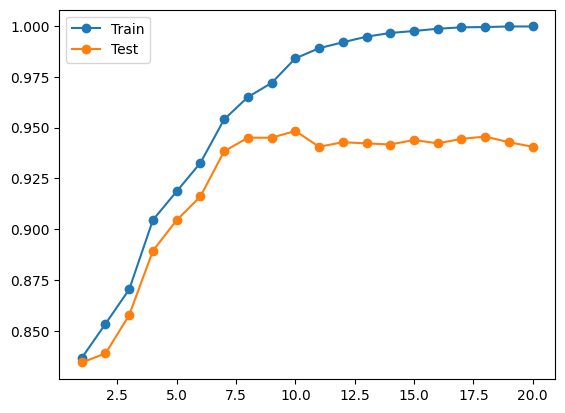

In [40]:
pyplot.plot(values, train_score, '-o', label='Train')
pyplot.plot(values, test_score, '-o', label='Test')
pyplot.legend()
pyplot.show()


-----

- As this Gaph shows that our model is Underfitting.


------

## **Use Grid Search Cv to Avoid this**

In [41]:
from sklearn.model_selection import GridSearchCV

### **Defining Model Parameters**

In [42]:
param_grid = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2,4,6,10,20], 'min_samples_split' : [5,10,20,50,100]}

### **Define a Classifier that can utilize Grid Search CV**

In [45]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)

### **Fit this on Our Training Data**

In [46]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

### **Select the Best Parameter**

In [47]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=20)

### **Print Accuracy to Check if we Adressed underfitting**

In [48]:
# Training
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))

0.9823611111111111


In [49]:
# Test
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9461111111111111
